<a href="https://colab.research.google.com/github/gh-pragadee/TASK---7/blob/main/TASK_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

In [5]:
data = pd.read_csv('breast-cancer.csv')

In [9]:
print(data.head())
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [10]:
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)
X_vis = X.iloc[:, :2]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)

In [11]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_scaled, y)

SVC(C=1, kernel='linear')

In [12]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_scaled, y)

SVC(C=1)

In [13]:
def plot_decision_boundary(model, X, y, title):
    X1, X2 = X[:, 0], X[:, 1]
    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))
    sns.scatterplot(x=X1, y=X2, hue=y, palette=['red', 'green'], edgecolor='k')
    plt.title(title)
    plt.show()

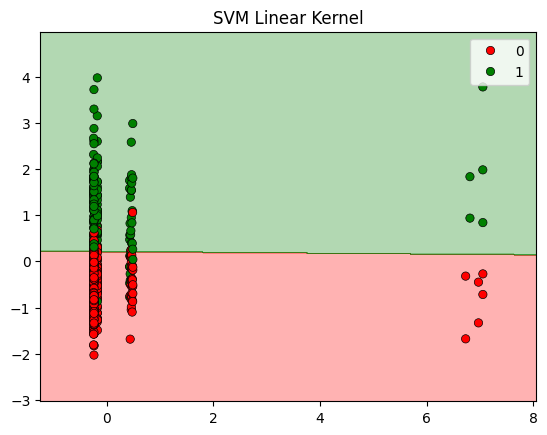

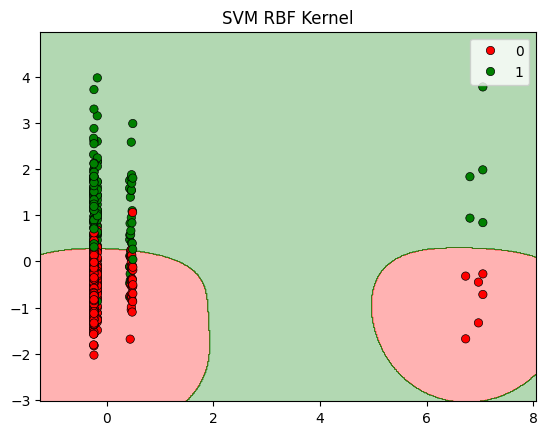

In [14]:
plot_decision_boundary(svm_linear, X_scaled, y, "SVM Linear Kernel")
plot_decision_boundary(svm_rbf, X_scaled, y, "SVM RBF Kernel")

In [15]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1, 10],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_scaled, y)
print("Best Hyperparameters:", grid.best_params_)

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [16]:
best_svm = grid.best_estimator_
cv_scores = cross_val_score(best_svm, X_scaled, y, cv=5)
print(f"Cross-validation Accuracy: {np.mean(cv_scores):.2f}")

Cross-validation Accuracy: 0.89


In [17]:
y_pred = best_svm.predict(X_scaled)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Confusion Matrix:
 [[343  14]
 [ 50 162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       357
           1       0.92      0.76      0.84       212

    accuracy                           0.89       569
   macro avg       0.90      0.86      0.87       569
weighted avg       0.89      0.89      0.89       569

